### Varaibles

1] age: age of primary beneficiary

2] sex: insurance contractor gender, female, male

3] bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

4] children: Number of children covered by health insurance / Number of dependents

5] smoker: Smoking

6] region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

7] charges: Individual medical costs billed by health insurance

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Loading DataSet

In [2]:
df = pd.read_csv(r"C:\Users\SHRUTI BHOSALE\Downloads\insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030
1338,?,female,44.700,0,no,southwesttt,12629.17000
1339,22,male,24.225,?,yes,NaN,10325.21000


### Data Overview

In [3]:
df.shape

(1341, 7)

There are 1341 Rows & 7 Columns in our Dataset.

In [4]:
df.head(11)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1341 non-null   object 
 1   sex       1341 non-null   object 
 2   bmi       1341 non-null   float64
 3   children  1341 non-null   object 
 4   smoker    1341 non-null   object 
 5   region    1340 non-null   object 
 6   charges   1341 non-null   float64
dtypes: float64(2), object(5)
memory usage: 73.5+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      1
charges     0
dtype: int64

We have 1 missing data in region column.

In [7]:
df['age'].value_counts()

18    69
19    68
47    29
22    29
20    29
52    29
45    29
48    29
46    29
51    29
50    29
49    28
25    28
28    28
24    28
26    28
53    28
27    28
21    28
23    28
54    28
43    27
44    27
29    27
40    27
42    27
41    27
30    27
31    27
33    26
55    26
32    26
56    26
34    26
57    26
38    25
39    25
37    25
36    25
59    25
58    25
35    25
61    23
62    23
60    23
63    23
64    22
?      1
77     1
Name: age, dtype: int64

In [8]:
df['children'].value_counts()

0    575
1    324
2    240
3    158
4     25
5     18
?      1
Name: children, dtype: int64

Here we can see that age & children column has a ? that means we have to replace those with np.NaN then fill those values.

### Missing Value Treatment

In [9]:
for i in ['age','children','region']:
    df[i].replace('?',np.nan,inplace=True)
    df[i].fillna(df[i].mode()[0],inplace=True)

In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1341 non-null   object 
 1   sex       1341 non-null   object 
 2   bmi       1341 non-null   float64
 3   children  1341 non-null   object 
 4   smoker    1341 non-null   object 
 5   region    1341 non-null   object 
 6   charges   1341 non-null   float64
dtypes: float64(2), object(5)
memory usage: 73.5+ KB


Here we can see that the data type of age & children column is wrong it should be int instead of object. So lets change the data type to int.

In [12]:
df['age'] = df['age'].astype(int)

In [13]:
df['children'] = df['children'].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1341 non-null   int32  
 1   sex       1341 non-null   object 
 2   bmi       1341 non-null   float64
 3   children  1341 non-null   int32  
 4   smoker    1341 non-null   object 
 5   region    1341 non-null   object 
 6   charges   1341 non-null   float64
dtypes: float64(2), int32(2), object(3)
memory usage: 63.0+ KB


In [15]:
df.nunique()

age           48
sex            2
bmi          549
children       6
smoker         2
region         5
charges     1340
dtype: int64

### Checking Duplicate Values

In [16]:
df.duplicated().sum()

1

### Removing Duplicate Values

In [17]:
df.drop_duplicates(df,inplace=True)
df.duplicated().sum()

0

In [18]:
print("Rows:",df.shape[0]," Columns:", df.shape[1])

Rows: 1340  Columns: 7


Now We have 1340 Rows & 7 Columns.

In [19]:
df['sex'].value_counts()

male      676
female    664
Name: sex, dtype: int64

In [20]:
df['smoker'].value_counts()

no     1064
yes     276
Name: smoker, dtype: int64

In [21]:
df['region'].value_counts()

southeast      365
southwest      326
northwest      324
northeast      324
southwesttt      1
Name: region, dtype: int64

### Encoding

In [22]:
df.select_dtypes(object).columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [23]:
catcol = df.select_dtypes(object).columns

In [24]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [25]:
df[catcol] = oe.fit_transform(df[catcol])

In [26]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520


In [27]:
df['region'].value_counts()

2.0    365
3.0    326
1.0    324
0.0    324
4.0      1
Name: region, dtype: int64

Now
* sex: 0.0 - female, 1.0 - male

* smoker: 1.0 - yes, 0.0 - no

* region: 0.0 - northeast, 1.0 - northwest, 2.0 - southeast, 3.0 - southwest, 4.0 - southwesttt

This clearly tells that 4.0 in region is nothing but southwest.

So Category 4.0 can Group into category 3.0.

In [28]:
df['region'].replace({4.0:3.0}, inplace=True)
df['region'].value_counts()

2.0    365
3.0    327
1.0    324
0.0    324
Name: region, dtype: int64

## Analysis of Independent Variables

### Age Variable

In [29]:
df['age'].mean()

39.221641791044775

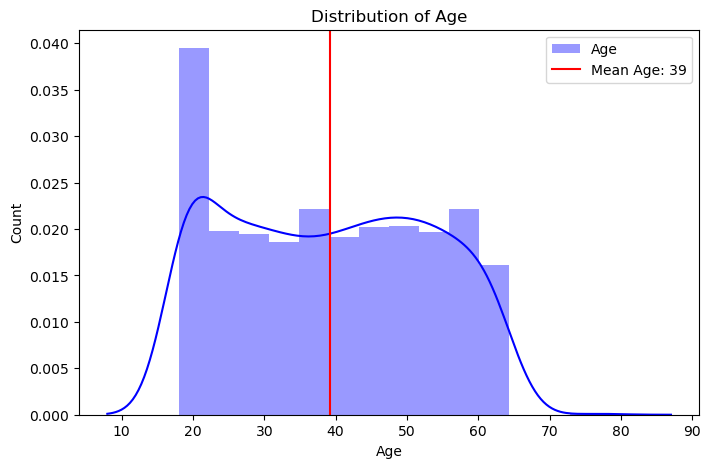

In [30]:
plt.figure(figsize=(8,5))
sns.distplot(x=df['age'],color='Blue',label='Age')
plt.axvline(x=df['age'].mean(),color='Red',label='Mean Age: 39')
plt.legend()
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Sex Variable

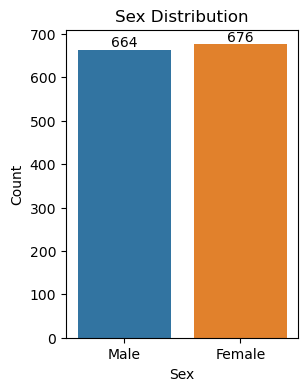

In [31]:
plt.figure(figsize=(3,4))
ax=sns.countplot(data = df, x= df['sex'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1], labels=['Male', 'Female'])
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

It is clear that number of males and females are almost equal in the dataset.

### bmi Variable

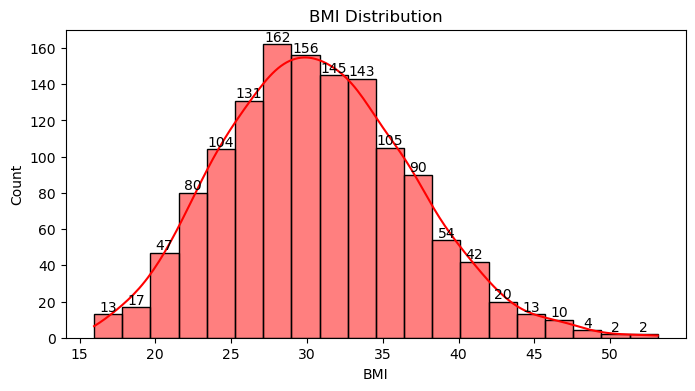

In [32]:
plt.figure(figsize=(8,4))
ax=sns.histplot(df['bmi'],bins=20, kde=True,color='red')
for label in ax.containers:
    ax.bar_label(label)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

The majority of the patients have BMI between 25 and 40 which is considered as overweight and could be a major factor in increasing the medical cost.

### Children Variable

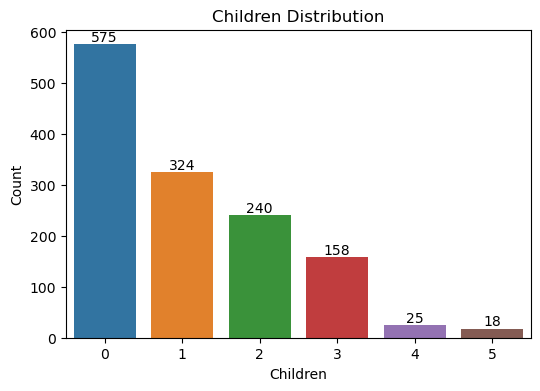

In [33]:
plt.figure(figsize=(6,4))
ax=sns.countplot(data = df, x = df['children'])
for label in ax.containers:
    ax.bar_label(label)
plt.title('Children Distribution')
plt.xlabel('Children')
plt.ylabel('Count')
plt.show()

The graph clearly shows that most of the patients have no children and very few patients have more than 3 children.

### Region Variable

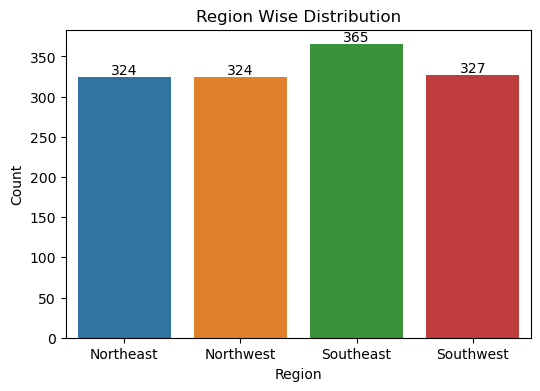

In [34]:
plt.figure(figsize=(6,4))
ax=sns.countplot(data = df, x = df['region'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1,2,3], labels=['Northeast', 'Northwest','Southeast','Southwest'])
plt.title('Region Wise Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

The count of patient from Southeast is slighltly higher than the other regions, but the number of patients from other regions are almost equal.

### Smokers Variable

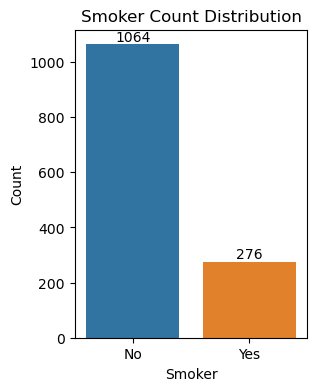

In [35]:
plt.figure(figsize=(3,4))
ax=sns.countplot(data = df, x = df['smoker'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1], labels=['No', 'Yes'])
plt.title('Smoker Count Distribution')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

Smokers are very few in the dataset. Nearly 80% of the patients are non-smokers.

### Smoker count w.r.t children count

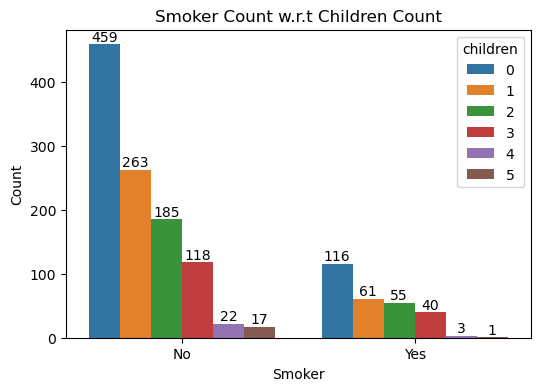

In [36]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x = df['smoker'], hue = df['children'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1], labels=['No', 'Yes'])
plt.title('Smoker Count w.r.t Children Count')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

## Analysis Of Dependent Variable

### Charges Variable

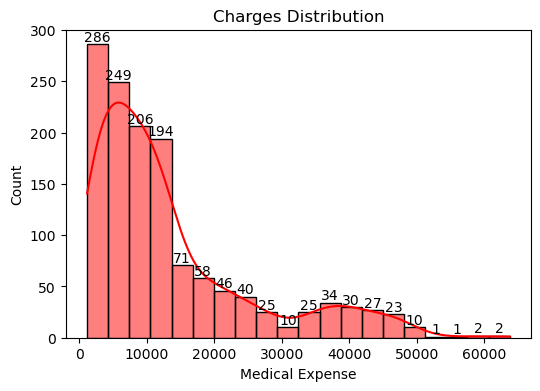

In [37]:
plt.figure(figsize=(6,4))
ax=sns.histplot(df['charges'],bins=20, kde=True,color='red')
for label in ax.containers:
    ax.bar_label(label)
plt.title('Charges Distribution')
plt.xlabel('Medical Expense')
plt.ylabel('Count')
plt.show()

Most of the medical expenses are below 20000, with negligible number of patients having medical expenses above 50000.

From all the above plots, we have a clear understanding about the count of patients under each category of the variables. Now I will look into the coorelation between the variables.

### Coorelation

In [38]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.021500,0.113121,0.046316,-0.022694,0.002396,0.301919
sex,-0.021500,1.000000,0.041092,0.016623,0.076637,0.003225,0.055671
bmi,0.113121,0.041092,1.000000,0.015661,0.006084,0.161565,0.203211
children,0.046316,0.016623,0.015661,1.000000,0.008626,0.016586,0.070456
smoker,-0.022694,0.076637,0.006084,0.008626,1.000000,-0.000249,0.786355
region,0.002396,0.003225,0.161565,0.016586,-0.000249,1.000000,-0.003980
charges,0.301919,0.055671,0.203211,0.070456,0.786355,-0.003980,1.000000


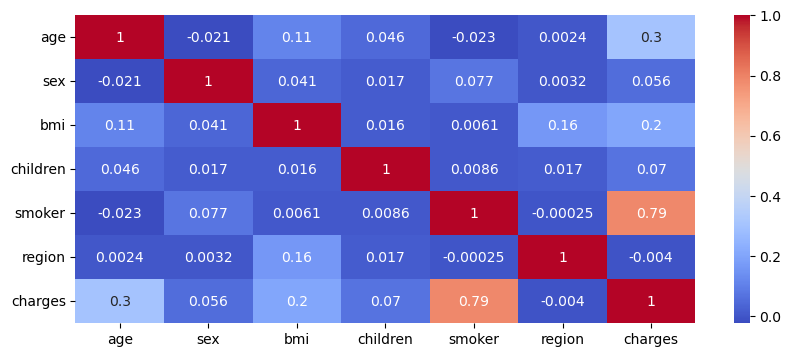

In [39]:
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

The variable smoker shows a significant coorelation with the medical expenses.

Now I will explore more into patients smoking habits and their relation with other factors.

### Smoker Count with Patients Gender

<Figure size 300x400 with 0 Axes>

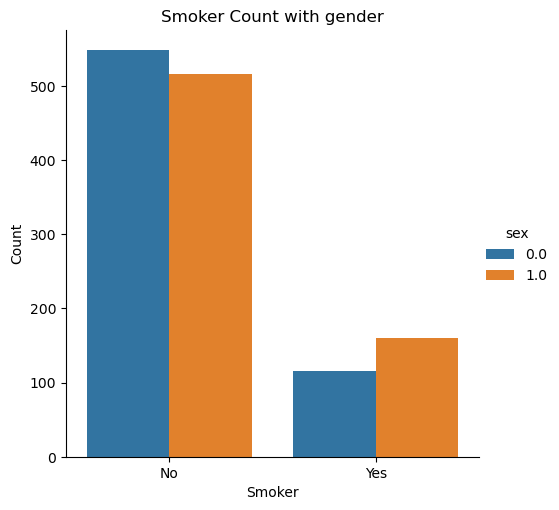

In [40]:
plt.figure(figsize=(3,4))
sns.catplot(data=df, x='smoker', kind='count',hue='sex')
plt.xticks([0,1], labels=["No", "Yes"])
plt.title('Smoker Count with gender')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

Here we can see that male smokers are more than female smokers. So, I will assume that medical treatment expense for males would be more than females, given the impact of smoking on the medical expenses.

### Charges w.r.t Patients Sex

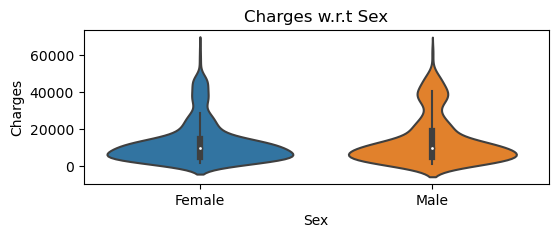

In [41]:
plt.figure(figsize=(6,2))
sns.violinplot(data = df, x = df['sex'], y = df['charges'])
plt.xticks([0,1], labels=["Female", "Male"])
plt.title('Charges w.r.t Sex')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()

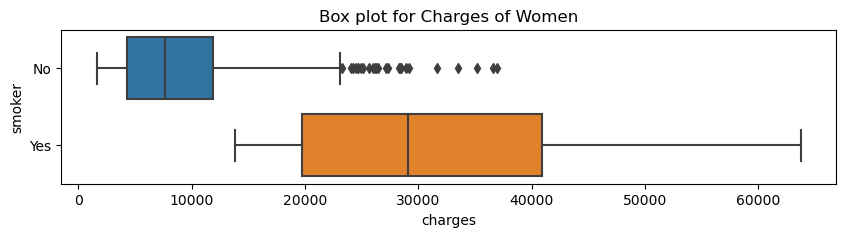

In [42]:
plt.figure(figsize=(10,2))
sns.boxplot(x = df[(df['sex'] == 0.0)]["charges"], y=df["smoker"],  orient="h")
plt.yticks([0,1], labels=["No", "Yes"])
plt.title("Box plot for Charges of Women")
plt.show()

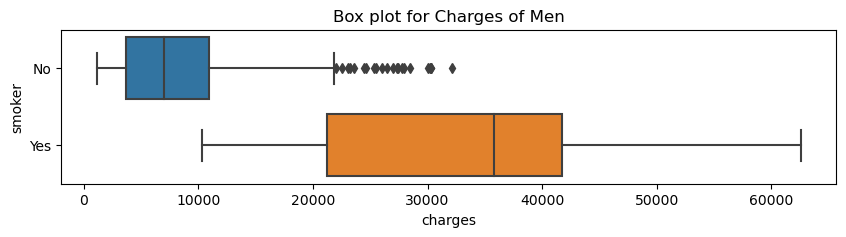

In [43]:
plt.figure(figsize=(10,2))
sns.boxplot(x = df[(df["sex"] == 1.0)]["charges"], y=df["smoker"] , orient="h")
plt.yticks([0,1], labels=["No", "Yes"])
plt.title("Box plot for Charges of Men")
plt.show()

The assumption is true, that the medical expense of males is greater than that of females. In addition to that medical expense of smokers is greater than that of non-smokers.

### Smokers and Age distribution

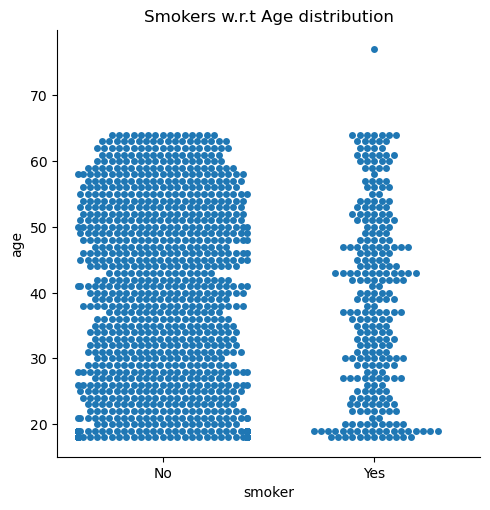

In [44]:
sns.catplot(data=df, x=df["smoker"], y=df["age"], kind="swarm")
plt.xticks([0,1], labels=["No", "Yes"])
plt.title("Smokers w.r.t Age distribution")
plt.show()

From the above graph, we can see that there are significant number of smokers of age 19.

Now I will study the medical expense of smokers of age 19.

### Smokers of Age 19

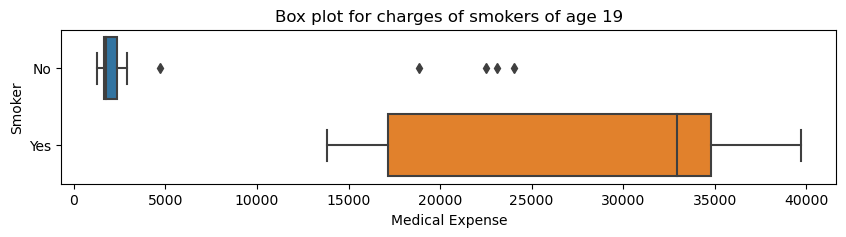

In [45]:
plt.figure(figsize=(10,2))
plt.title("Box plot for charges of smokers of age 19")
sns.boxplot(x=df[(df["age"] == 19)]["charges"], y=df["smoker"] , orient="h")
plt.yticks([0,1], labels=["No", "Yes"])
plt.xlabel('Medical Expense')
plt.ylabel('Smoker')
plt.show()

Here the medical expense of smokers of age 19 is very high in comparison to non smokers. In non smokers we can see some outliers, which may be due to illness or accidents.

Now I will plot the charges distribution with repect to patients age of smokers and non-smokers.

### Non Smokers Charge Distribution

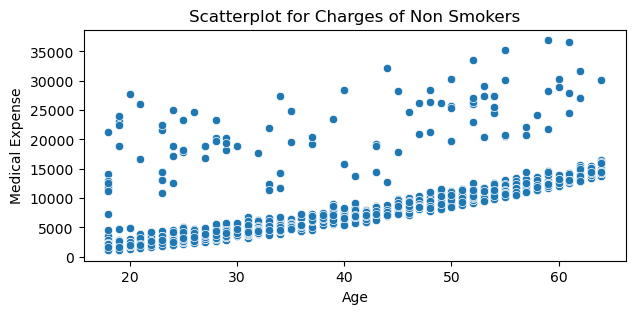

In [46]:
plt.figure(figsize=(7,3))
plt.title("Scatterplot for Charges of Non Smokers")
sns.scatterplot(x=df[(df['smoker'] == 0.0)]['age'], y=df["charges"])
plt.xlabel('Age')
plt.ylabel('Medical Expense')
plt.show()

Majority of the points shows that medical expense increases with age which may be due to the fact that older people are more prone to illness. But there are some outliers which shows that there are other illness or accidents which may increase the medical expense.

### Smokers Charge Distribution

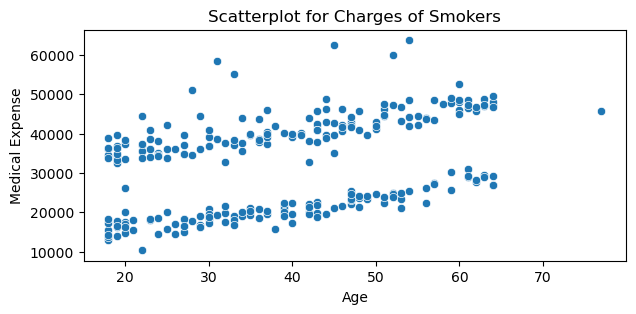

In [47]:
plt.figure(figsize=(7,3))
sns.scatterplot(x=df[(df['smoker'] == 1.0)]['age'], y=df['charges'])
plt.title("Scatterplot for Charges of Smokers")
plt.xlabel('Age')
plt.ylabel('Medical Expense')
plt.show()

Here there are two segments, one with high medical expense which may be due to smoking related illness and the other with low medical expense which may be due age related illness.

 Now I will combine these two graphs.

### Age Charges Distribution

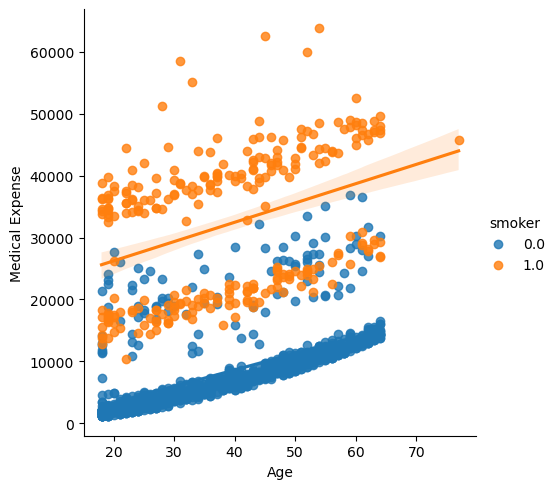

In [48]:
sns.lmplot(data=df, x="age", y="charges", hue = 'smoker')
plt.xlabel('Age')
plt.ylabel('Medical Expense')
plt.show()

Now, we clearly understand the variation in charges with respect to age and smoking habits. The medical expense of smokers is higher than that of non-smokers. In non-smokers, the cost of treatment increases with age which is obvious. But in smokers, the cost of treatment is high even for younger patients, which means the smoking patients are spending upon their smoking related illness as well as age related illness.

### Charges distribution for patients with BMI greater than 30

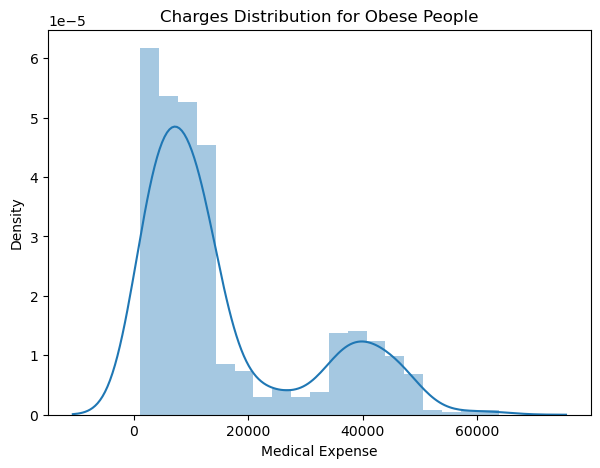

In [49]:
plt.figure(figsize=(7,5))
sns.distplot(x=df[(df.bmi >= 30)]['charges'])
plt.title('Charges Distribution for Obese People')
plt.xlabel('Medical Expense')
plt.show()

### Charges distribution for patients with BMI less than 30

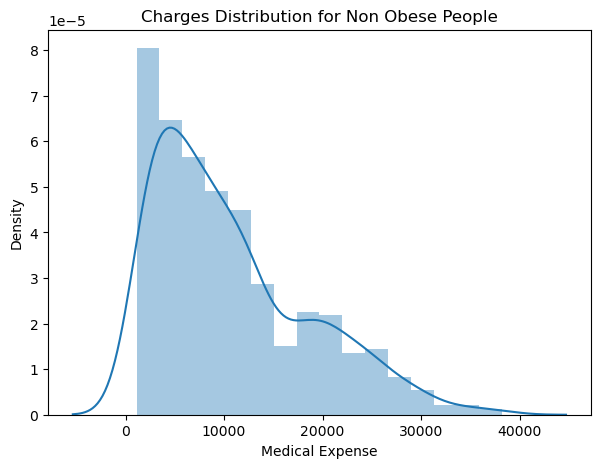

In [50]:
plt.figure(figsize=(7,5))
sns.distplot(x=df[(df.bmi < 30)]['charges'])
plt.title('Charges Distribution for Non Obese People')
plt.xlabel('Medical Expense')
plt.show()

Therefore, patients with BMI less than 30 are spending less on medical treatment than those with BMI greater than 30.

Now, I will build a model to predict the medical expense of patients.

### Train Test Split

In [51]:
x = df.drop(['charges'], axis=1)
y = df['charges']

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [53]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [54]:
lr.fit(X_train,y_train)

LinearRegression()

In [55]:
lr.score(X_train,y_train)

0.7441237658010037

In [56]:
y_pred = lr.predict(X_test)

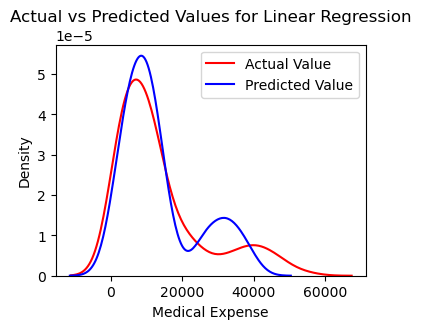

In [57]:
plt.figure(figsize=(4,3))
sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(y_pred,hist=False,color='b',label='Predicted Value')
plt.title('Actual vs Predicted Values for Linear Regression')
plt.xlabel('Medical Expense')
plt.legend()
plt.show()

In [58]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [59]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

In [60]:
print("MAE : ",mae)
print("MSE : ",mse)
print("RMSE : ",rmse)
print("Accuracy : ",r2)

MAE :  4196.614839864606
MSE :  35305487.14256517
RMSE :  5941.84206644414
Accuracy :  0.7737776738833215
